In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import sys
import pdb
import matplotlib.pyplot as plt
from glob import glob

In [4]:
sys.path.append('../..')

In [5]:
from loaders import load_sabes

In [6]:
# Test whether the timescales for Loco are similar to sabes. In particular, what do the autocorrelation functions look like. What does decoding look like

In [11]:
data_files = glob('/mnt/Secondary/data/sabes/*.mat')

In [18]:
indy_files = [file for file in data_files if 'indy' in file]
loco_files = [file for file in data_files if 'loco' in file]

In [20]:
from dca.cov_util import calc_cross_cov_mats_from_data, form_lag_matrix

In [21]:
# Store the diagonal
indy_ccm = []
loco_ccm = []

for file in indy_files:
    dat = load_sabes(file)
    ccm = calc_cross_cov_mats_from_data(np.squeeze(dat['spike_rates']), 20)
    diags = np.zeros((20, ccm.shape[1]))
    for j in range(ccm.shape[1]):
        diags[:, j] = [ccm[idx, j, j] for idx in range(20)]
    indy_ccm.append(diags)

for file in loco_files:
    dat = load_sabes(file)
    ccm = calc_cross_cov_mats_from_data(np.squeeze(dat['spike_rates']), 20)
    diags = np.zeros((20, ccm.shape[1]))
    for j in range(ccm.shape[1]):
        diags[:, j] = [ccm[idx, j, j] for idx in range(20)]
    loco_ccm.append(diags)


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.28s/it]


Processing spikes


100%|██████████| 1/1 [00:22<00:00, 22.71s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.67s/it]


Processing spikes


100%|██████████| 1/1 [00:31<00:00, 31.21s/it]


Processing spikes


100%|██████████| 1/1 [00:13<00:00, 13.63s/it]


Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.34s/it]


Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.74s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.57s/it]


Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.29s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.89s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.88s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.75s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.62s/it]


Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.38s/it]


Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.83s/it]


Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.14s/it]


Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.15s/it]


Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.30s/it]


Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.61s/it]


Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.39s/it]


Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.68s/it]


Processing spikes


100%|██████████| 1/1 [00:07<00:00,  7.51s/it]


Processing spikes


100%|██████████| 1/1 [00:15<00:00, 15.88s/it]


Processing spikes


100%|██████████| 1/1 [00:21<00:00, 21.73s/it]


Processing spikes


100%|██████████| 1/1 [00:29<00:00, 29.12s/it]


Processing spikes


100%|██████████| 1/1 [00:10<00:00, 10.27s/it]


Processing spikes


100%|██████████| 1/1 [00:24<00:00, 24.24s/it]


Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.81s/it]


Processing spikes


100%|██████████| 1/1 [00:18<00:00, 18.38s/it]


Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.49s/it]


Processing spikes


100%|██████████| 1/1 [00:10<00:00, 10.60s/it]


Processing spikes


100%|██████████| 1/1 [00:20<00:00, 20.75s/it]


In [22]:
indy_ccm[0].shape

(20, 129)

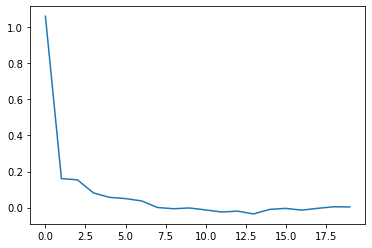

In [29]:
plt.plot(indy_ccm[0][:, 6])

In [38]:
# Get an autocorrelation time (time to get < 0.1 * max)
indy_autocorr_times = []
loco_autocorr_times = []
for i in range(len(indy_ccm)):
    autocorr_times = np.zeros(indy_ccm[i].shape[1])
    for j in range(indy_ccm[i].shape[1]):
        try:
            autocorr_times[j] = np.where(indy_ccm[i][:, j] < 0.1 * indy_ccm[i][0, j])[0][0]
        except:
            autocorr_times[j] = 20
    indy_autocorr_times.extend(autocorr_times)

for i in range(len(loco_ccm)):
    autocorr_times = np.zeros(loco_ccm[i].shape[1])
    for j in range(loco_ccm[i].shape[1]):
        try:
            autocorr_times[j] = np.where(loco_ccm[i][:, j] < 0.1 * loco_ccm[i][0, j])[0][0]
        except:
            autocorr_times[j] = 20
    loco_autocorr_times.extend(autocorr_times)

(array([4.70484524e-01, 3.72208437e-02, 9.46846023e-03, 4.24448217e-03,
        1.95899177e-03, 1.30599451e-03, 3.26498629e-04, 0.00000000e+00,
        0.00000000e+00, 1.30599451e-03]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

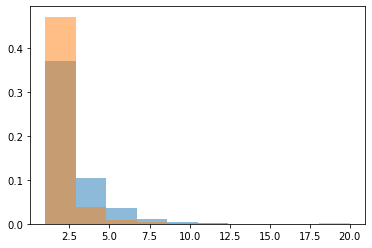

In [42]:
plt.hist(indy_autocorr_times, density=True, alpha=0.5)
plt.hist(loco_autocorr_times, density=True, alpha=0.5)

In [51]:
import itertools
from decoders import lr_decoder
from sklearn.model_selection import KFold
from tqdm import tqdm

In [58]:
# Other check: What does decoding look like for different bin sizes and lags
# Sweep over bin_sizes, filtering parameters, lag, decodingwindow
bin_widths = [10, 20, 50, 100, 200]
#filters = [('none', {})]
#filters.extend([('gaussian', {'sigma':sigma}) for sigma in [50, 100, 250, 500]])

#loader_params = list(itertools.product(bin_widths, filters))

lags = np.linspace(-15, 15, 7).astype(int)
decoding_windows = [1, 3, 6, 10, 25]

decoding_params = list(itertools.product(lags, decoding_windows))
n_cv = 5

results_list = []

for i, bin_width in tqdm(enumerate(bin_widths)):
    dat = load_sabes(loco_files[0], spike_threshold=100, bin_width=bin_width)

    cv = KFold(n_cv, shuffle=False)
    fold_idx = 0
        
    for train_idxs, test_idxs in cv.split(np.squeeze(dat['spike_rates'])):
        for j, decoding_param in enumerate(decoding_params):
            xtrain = np.squeeze(dat['spike_rates'])[train_idxs]
            xtest = np.squeeze(dat['spike_rates'])[test_idxs]
            
            # Add axis at the end since position is 1D
            ztrain = dat['behavior'][train_idxs]
            ztest = dat['behavior'][test_idxs]

            lr_r2_pos, lr_r2_vel, lr_r2_acc, _ = lr_decoder(xtest, xtrain, ztest, ztrain, 
                                   decoding_param[0], decoding_param[0],
                                   decoding_param[1])
            result = {}
            result['bin_width'] = bin_width
            result['fold_idx']= fold_idx
            result['lag'] = decoding_param[0]
            result['decoding_window'] = decoding_param[1]
            result['r2'] = lr_r2_vel
            results_list.append(result)
        fold_idx += 1



0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:21<00:00, 81.34s/it]
1it [23:00, 1380.93s/it]

Processing spikes


100%|██████████| 1/1 [00:41<00:00, 41.33s/it]
2it [35:11, 998.36s/it] 

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.60s/it]
3it [41:42, 720.85s/it]

Processing spikes


100%|██████████| 1/1 [00:08<00:00,  8.25s/it]
4it [46:30, 550.04s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
5it [50:30, 606.03s/it]


In [60]:
import pickle

In [61]:
with open('loco_decoding_test.dat', 'wb') as f:
    f.write(pickle.dumps(results_list))

In [68]:
import pandas as pd
from utils import apply_df_filters

In [63]:
df = pd.DataFrame(results_list)

In [66]:
bin_width = np.unique(df['bin_width'].values)
fold_idx = np.unique(df['fold_idx'].values)
lag = np.unique(df['lag'].values)
decoding_window = np.unique(df['decoding_window'].values)

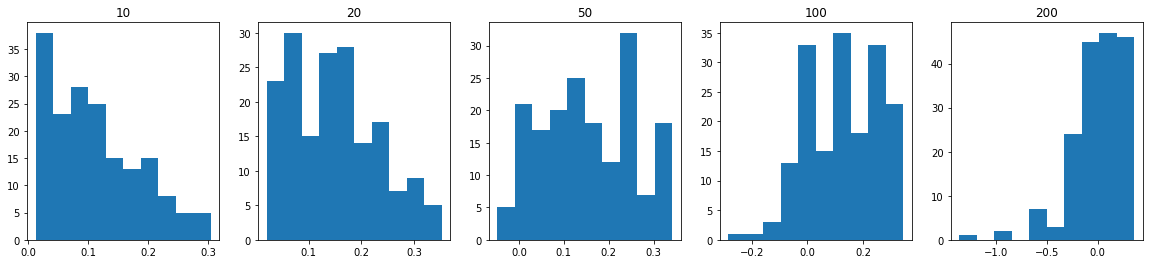

In [70]:
# Histogram across bin_width
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, bw in enumerate(bin_width):
    df_ = apply_df_filters(df, bin_width=bw)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(bw)


In [71]:
lag

array([-15, -10,  -5,   0,   5,  10,  15])

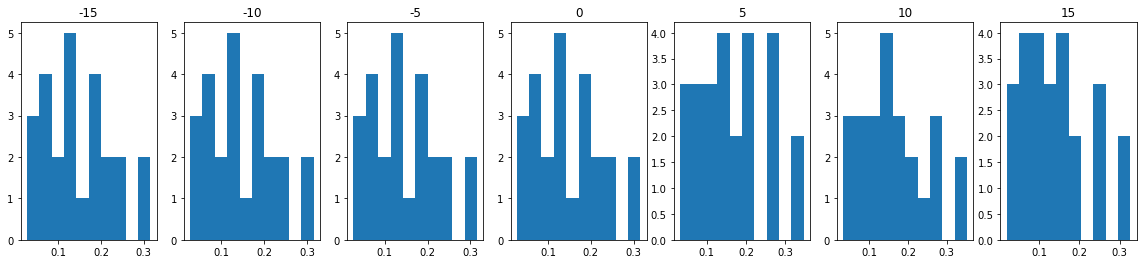

In [73]:
# Histogram across bin_width
fig, ax = plt.subplots(1, 7, figsize=(20, 4))
for i, l in enumerate(lag):
    df_ = apply_df_filters(df, lag=l, bin_width=20)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(l)


In [74]:
decoding_window

array([ 1,  3,  6, 10, 25])

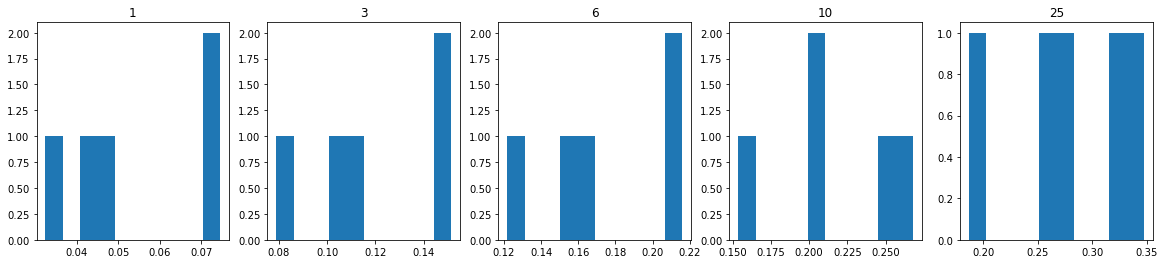

In [75]:
# Histogram across bin_width
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, dw in enumerate(decoding_window):
    df_ = apply_df_filters(df, lag=5, bin_width=20, decoding_window=dw)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(dw)


In [ ]:
# Generally is quite poor, can try a different loco file

In [82]:
# Other check: What does decoding look like for different bin sizes and lags
# Sweep over bin_sizes, filtering parameters, lag, decodingwindow
bin_widths = [10, 20, 50, 100, 200]
#filters = [('none', {})]
#filters.extend([('gaussian', {'sigma':sigma}) for sigma in [50, 100, 250, 500]])

#loader_params = list(itertools.product(bin_widths, filters))

lags = np.linspace(-15, 15, 7).astype(int)
decoding_windows = [1, 3, 6, 10, 25]

decoding_params = list(itertools.product(lags, decoding_windows))
n_cv = 5

results_list = []

for data_file in loco_files:
    for i, bin_width in tqdm(enumerate(bin_widths)):
        dat = load_sabes(data_file, spike_threshold=100, bin_width=bin_width)

        cv = KFold(n_cv, shuffle=False)
        fold_idx = 0
            
        for train_idxs, test_idxs in cv.split(np.squeeze(dat['spike_rates'])):
            for j, decoding_param in enumerate(decoding_params):
                xtrain = np.squeeze(dat['spike_rates'])[train_idxs]
                xtest = np.squeeze(dat['spike_rates'])[test_idxs]
                
                # Add axis at the end since position is 1D
                ztrain = dat['behavior'][train_idxs]
                ztest = dat['behavior'][test_idxs]

                lr_r2_pos, lr_r2_vel, lr_r2_acc, _ = lr_decoder(xtest, xtrain, ztest, ztrain, 
                                    decoding_param[0], decoding_param[0],
                                    decoding_param[1])
                result = {}
                result['data_file'] = data_file
                result['bin_width'] = bin_width
                result['fold_idx']= fold_idx
                result['lag'] = decoding_param[0]
                result['decoding_window'] = decoding_param[1]
                result['r2'] = lr_r2_vel
                results_list.append(result)
            fold_idx += 1



0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:20<00:00, 80.27s/it]
1it [20:52, 1252.02s/it]

Processing spikes


100%|██████████| 1/1 [00:40<00:00, 40.47s/it]
2it [31:52, 904.00s/it] 

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.29s/it]
3it [37:49, 654.31s/it]

Processing spikes


100%|██████████| 1/1 [00:08<00:00,  8.16s/it]
4it [42:10, 498.90s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.11s/it]
5it [45:49, 549.86s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:50<00:00, 110.81s/it]
1it [39:48, 2388.37s/it]

Processing spikes


100%|██████████| 1/1 [00:54<00:00, 54.87s/it]
2it [55:16, 1529.24s/it]

Processing spikes


100%|██████████| 1/1 [00:21<00:00, 21.98s/it]
3it [1:02:54, 1040.37s/it]

Processing spikes


100%|██████████| 1/1 [00:11<00:00, 11.28s/it]
4it [1:08:20, 758.19s/it] 

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.51s/it]
5it [1:12:37, 871.54s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [02:24<00:00, 144.78s/it]
1it [55:58, 3358.11s/it]

Processing spikes


100%|██████████| 1/1 [01:11<00:00, 71.50s/it]
2it [1:15:55, 2087.29s/it]

Processing spikes


100%|██████████| 1/1 [00:28<00:00, 28.72s/it]
3it [1:25:51, 1406.04s/it]

Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.69s/it]
4it [1:32:45, 1014.56s/it]

Processing spikes


100%|██████████| 1/1 [00:07<00:00,  7.34s/it]
5it [1:38:07, 1177.53s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:50<00:00, 50.22s/it]
1it [11:22, 682.90s/it]

Processing spikes


100%|██████████| 1/1 [00:25<00:00, 25.56s/it]
2it [17:35, 500.42s/it]

Processing spikes


100%|██████████| 1/1 [00:10<00:00, 10.21s/it]
3it [21:10, 370.02s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.18s/it]
4it [23:54, 288.84s/it]

Processing spikes


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]
5it [27:45, 333.16s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [02:01<00:00, 121.16s/it]
1it [44:48, 2688.35s/it]

Processing spikes


100%|██████████| 1/1 [01:00<00:00, 60.97s/it]
2it [1:02:04, 1716.56s/it]

Processing spikes


100%|██████████| 1/1 [00:24<00:00, 24.46s/it]
3it [1:10:24, 1160.95s/it]

Processing spikes


100%|██████████| 1/1 [00:12<00:00, 12.20s/it]
4it [1:16:19, 842.89s/it] 

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.13s/it]
5it [1:20:55, 971.17s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:23<00:00, 83.42s/it]
1it [24:05, 1445.50s/it]

Processing spikes


100%|██████████| 1/1 [00:41<00:00, 41.28s/it]
2it [36:58, 1050.19s/it]

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.77s/it]
3it [44:00, 763.09s/it] 

Processing spikes


100%|██████████| 1/1 [00:08<00:00,  8.34s/it]
4it [49:13, 585.59s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.27s/it]
5it [53:42, 644.41s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:29<00:00, 89.80s/it]
1it [43:57, 2637.73s/it]

Processing spikes


100%|██████████| 1/1 [00:45<00:00, 45.64s/it]
2it [1:03:13, 1766.01s/it]

Processing spikes


100%|██████████| 1/1 [00:18<00:00, 18.28s/it]
3it [1:14:53, 1279.37s/it]

Processing spikes


100%|██████████| 1/1 [00:09<00:00,  9.13s/it]
4it [1:24:15, 995.88s/it] 

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.72s/it]
5it [1:32:27, 1109.55s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:20<00:00, 80.39s/it]
1it [31:02, 1862.62s/it]

Processing spikes


100%|██████████| 1/1 [00:40<00:00, 40.44s/it]
2it [49:29, 1418.01s/it]

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.29s/it]
3it [1:01:22, 1096.12s/it]

Processing spikes


100%|██████████| 1/1 [00:08<00:00,  8.15s/it]
4it [1:11:03, 892.65s/it] 

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
5it [1:26:47, 1041.46s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:52<00:00, 52.34s/it]
1it [27:40, 1660.45s/it]

Processing spikes


100%|██████████| 1/1 [00:26<00:00, 26.36s/it]
2it [46:21, 1343.21s/it]

Processing spikes


100%|██████████| 1/1 [00:10<00:00, 10.59s/it]
3it [1:00:18, 1112.07s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.34s/it]
4it [1:12:39, 965.47s/it] 

Processing spikes


100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
5it [1:22:34, 990.93s/it]
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [01:42<00:00, 102.42s/it]
0it [57:29, ?it/s]


KeyboardInterrupt: 

In [85]:
loco_files

['/mnt/Secondary/data/sabes/loco_20170210_03.mat',
 '/mnt/Secondary/data/sabes/loco_20170213_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170214_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170215_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170216_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170217_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170227_04.mat',
 '/mnt/Secondary/data/sabes/loco_20170228_02.mat',
 '/mnt/Secondary/data/sabes/loco_20170301_05.mat',
 '/mnt/Secondary/data/sabes/loco_20170302_02.mat']

In [84]:
data_file

'/mnt/Secondary/data/sabes/loco_20170302_02.mat'

In [83]:
len(results_list)

8028

In [86]:
df = pd.DataFrame(results_list)

In [88]:
with open('loco_decoding_test.dat', 'wb') as f:
    f.write(pickle.dumps(df))

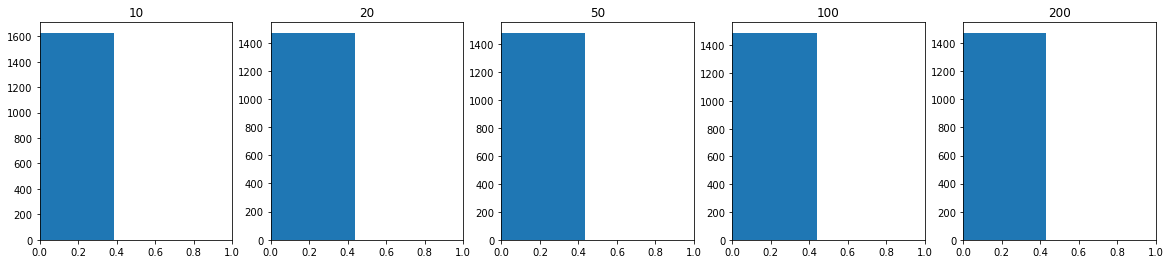

In [90]:
# Histogram across bin_width
bin_width = np.unique(df['bin_width'].values)
fold_idx = np.unique(df['fold_idx'].values)
lag = np.unique(df['lag'].values)
decoding_window = np.unique(df['decoding_window'].values)

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, bw in enumerate(bin_width):
    df_ = apply_df_filters(df, bin_width=bw)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(bw)
    ax[i].set_xlim([0, 1])

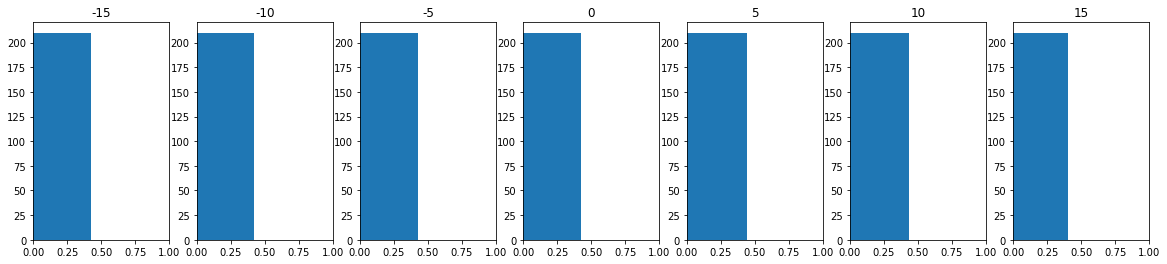

In [92]:
# Histogram across bin_width
bin_width = np.unique(df['bin_width'].values)
fold_idx = np.unique(df['fold_idx'].values)
lag = np.unique(df['lag'].values)
decoding_window = np.unique(df['decoding_window'].values)

fig, ax = plt.subplots(1, lag.size, figsize=(20, 4))
for i, bw in enumerate(lag):
    df_ = apply_df_filters(df, bin_width=20, lag=bw)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(bw)
    ax[i].set_xlim([0, 1])

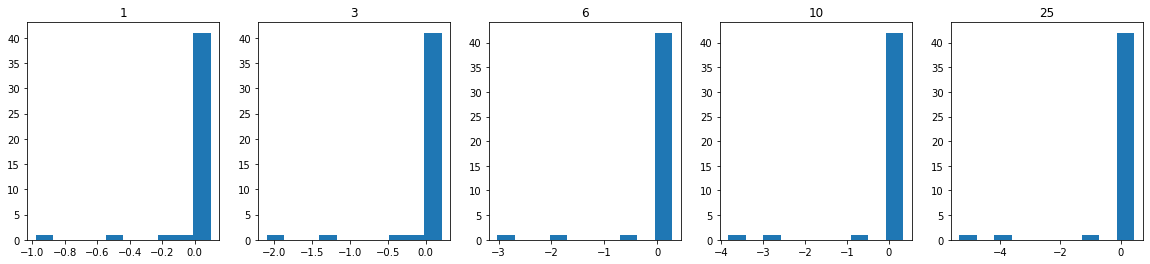

In [94]:
# Histogram across bin_width
bin_width = np.unique(df['bin_width'].values)
fold_idx = np.unique(df['fold_idx'].values)
lag = np.unique(df['lag'].values)
decoding_window = np.unique(df['decoding_window'].values)

fig, ax = plt.subplots(1, decoding_window.size, figsize=(20, 4))
for i, bw in enumerate(decoding_window):
    df_ = apply_df_filters(df, bin_width=20, lag=5, decoding_window=bw)
    ax[i].hist(df_['r2'].values)
    ax[i].set_title(bw)
    #ax[i].set_xlim([0, 1])

In [98]:
# Generally very poor, one could try with the position instead of the velocity, no guarantees about PCA vs. LQGCA here. Double check with a few indy files to
# make sure that the code is correct

In [97]:
# Overnight: Fit ~ 5 indy files cross-validated as a backup